In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\thora\\Documents\\income.csv")

In [4]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
df.shape

(22, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [8]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [9]:
df.drop("Name",axis = 1,inplace = True)

In [10]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


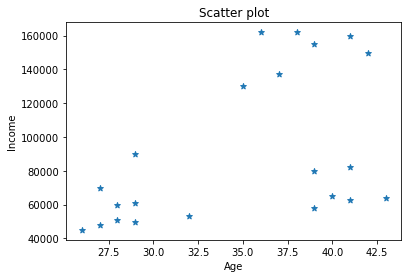

In [12]:
plt.scatter(df['Age'],df['Income'],marker = "*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title('Scatter plot')
plt.show()

In [14]:
X = df[['Age','Income']]

In [15]:
X.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
Scaler = MinMaxScaler()

In [19]:
ScaledX = Scaler.fit_transform(X)

In [20]:
ScaledX

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 1.        ],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [21]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters = 3)

In [24]:
model.fit(ScaledX)

KMeans(n_clusters=3)

In [25]:
model.predict(ScaledX)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [26]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [27]:
df['clusters']= model.predict(ScaledX)

In [28]:
df.head()

,Age,Income,clusters
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [29]:
df0 = df[df['clusters'] == 0]

In [30]:
df0

,Age,Income,clusters
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
11,26,45000,0
12,27,48000,0
13,28,51000,0
14,29,49500,0
15,32,53000,0


In [31]:
df1 = df[df['clusters'] == 1]

In [32]:
df1

,Age,Income,clusters
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,162000,1
9,35,130000,1
10,37,137000,1


In [33]:
df2 = df[df['clusters'] == 2]

In [34]:
df2

,Age,Income,clusters
16,40,65000,2
17,41,63000,2
18,43,64000,2
19,39,80000,2
20,41,82000,2
21,39,58000,2


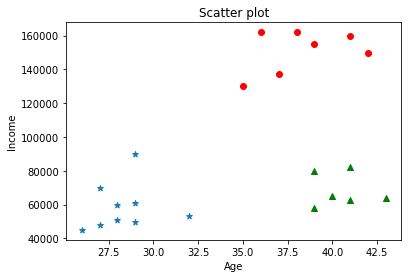

In [40]:
plt.scatter(df0['Age'],df0['Income'],marker = "*")
plt.scatter(df1['Age'],df1['Income'],color = "red")
plt.scatter(df2['Age'],df2['Income'],marker = "^",color = 'green')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title('Scatter plot')
plt.show()